<a href="https://colab.research.google.com/github/tin7/NumericalLinearAlgebra/blob/main/ALN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  <h1><center> <font color='red'>*ALGEBRA LINEAL NUMÉRICA Curso EPEC 20230212*</font>

<h4><center>Docente:Luciano Ponzellini Marinelli</center></h4>

<h4><center>Universidad Nacional de Rosario</center></h4>

<h4><center>Facultad de Ciencias Exactas, Ingeniería y Agrimensura</center></h4>

# **Anotaciones y tareas del curso.**

# **<font color='yellow'>Lectura 1**

Multiplicacion matriz-vector

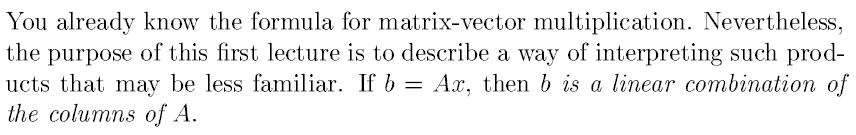

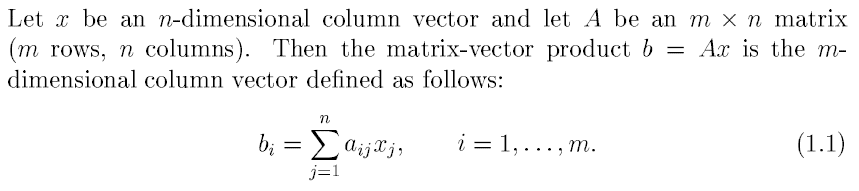

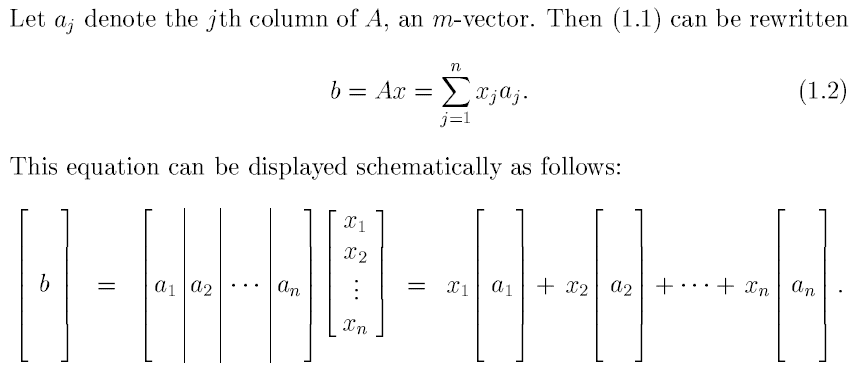

# **<font color='yellow'>Lectura 2**

# Vectores ortogonales y matrices



*   Adjunta
*   Producto interno

*   Vectores Ortogonales
*   Componentes de un vector


*   Matriz Unitaria








# `TAREA 1`

Considere el problema de resolver num ́ericamente un sistema
de ecuaciones lineales

Ax = b,

por uno o varios m ́etodos num ́ericos que conozca.
- Elija alguna matriz de la coleccion Matrix Market que sea
del campo de aplicaci ́on de su interés . Puede obtenerla de la
página web: https://math.nist.gov/MatrixMarket/
- Escoja como vector del lado derecho b aquel que garantice
que la soluci ́on del problema sea x = [1, . . . , 1]T
.

- Para su aproximación x ̃ calcule el vector residual r = b - Ax ̃,
el vector error e = x - x ̃, el tiempo computacional del método
u otro recurso que facilite un análisis de la solución obtenida.

# MATRIZ

S1RMQ4M1: Finite element analysis of cylindrical shells
Cylindrical shell, uniform <font color='yellow'>30x30 quadrilateral</font> mesh, stabilized MITC4 elements

SIZE 5489 x 5489, 143300 entries


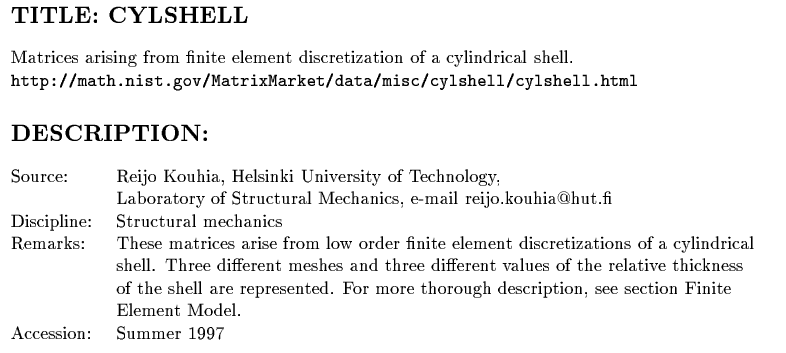

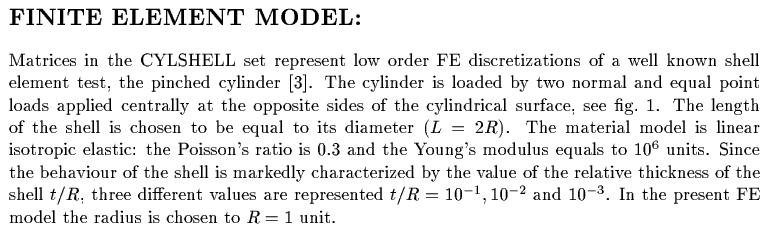

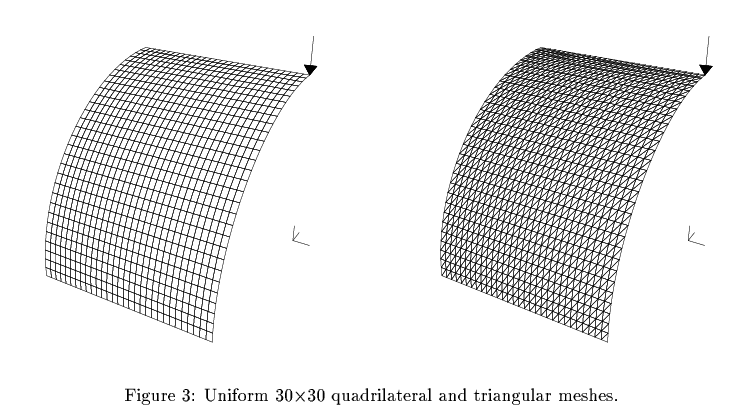

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

import scipy.io
from scipy.sparse import csr_matrix
import pandas as pd
import numpy as np
import time

# Working with sparse matrix in Python
# https://gist.github.com/Puriney/98544b779bcb815926f7acf87f537e61

mtx_mat = scipy.io.mmread('/content/drive/MyDrive/Colab Notebooks/30x30.mtx')
csr_mat = mtx_mat.tocsr(copy=True)

#Convierto a DataFrame
df = pd.DataFrame.sparse.from_spmatrix(csr_mat)
df.fillna(0, inplace=True)

#Convierto a Arreglo Numpy
A = df.to_numpy()

x = np.ones(A.shape[1])

b = A.dot(x)

#Resuelvo sistema linea con np.linalg.solve(A, b) que utiliza el
#paquete LAPACK de fortran utilizando LU.
#https://www.netlib.org/lapack/explore-html/d7/d3b/group__double_g_esolve_ga5ee879032a8365897c3ba91e3dc8d512.html
inicio = time.time()

x1 = np.linalg.solve(A, b)

fin = time.time()
tiempo_calculo = fin - inicio

#residuo
r = np.linalg.norm(b - A.dot(x1))

#error
e = np.linalg.norm(x - x1)

print("res",r)
print("error",e)
print("\nTiempo de cálculo linalg:", tiempo_calculo, "segundos")

#metodo de la inversa
inicio_inv = time.time()
A_inv = np.linalg.inv(A)
x_inv = A_inv.dot(b)
fin_inv = time.time()
tiempo_inv = fin_inv - inicio_inv

#residuo
r_inv = np.linalg.norm(b - A.dot(x1))
#error
e_inv = np.linalg.norm(x - x_inv)

print("--------------------------------------")
print("r_inv",r_inv)
print("error_inv",e_inv)
print("\nTiempo de cálculo inv:", tiempo_inv, "segundos")


res 4.150059244049684e-08
error 2.022993921971776e-09

Tiempo de cálculo linalg: 3.77998948097229 segundos
--------------------------------------
r_inv 4.150059244049684e-08
error_inv 2.633127516345567e-08

Tiempo de cálculo inv: 18.154297828674316 segundos


# **<font color='yellow'>Lectura 3**


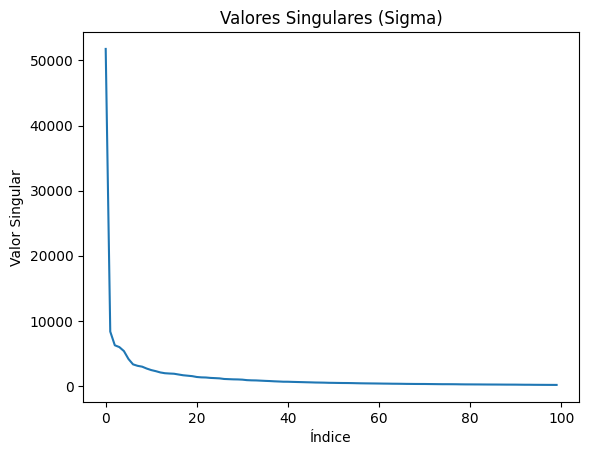

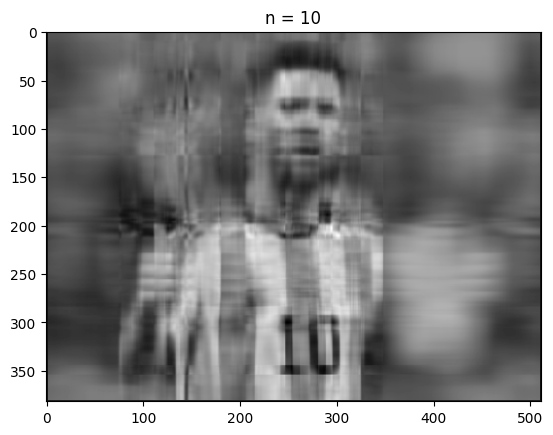

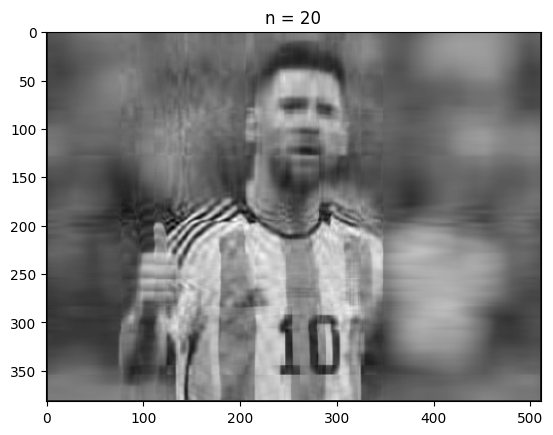

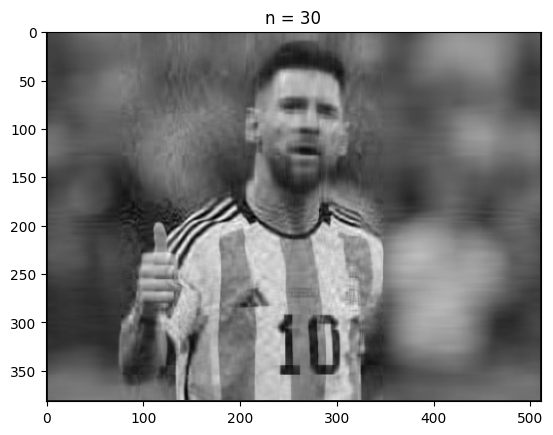

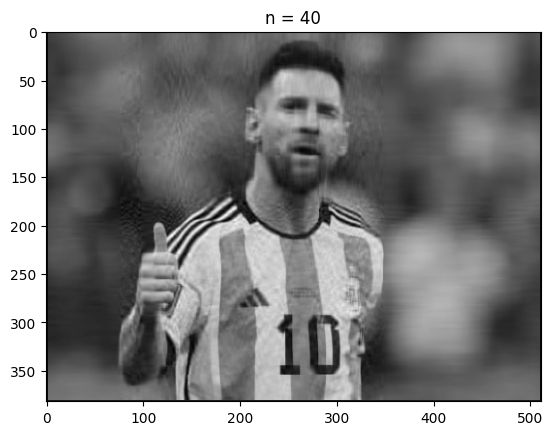

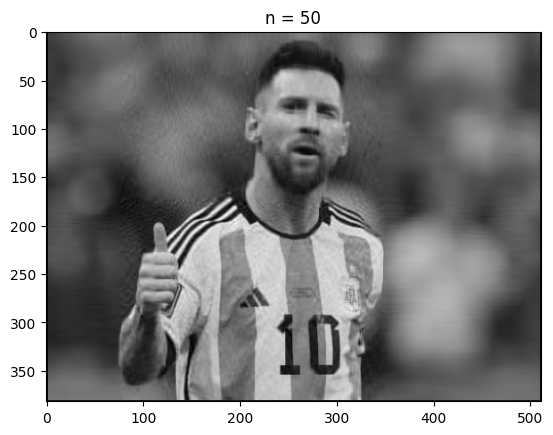

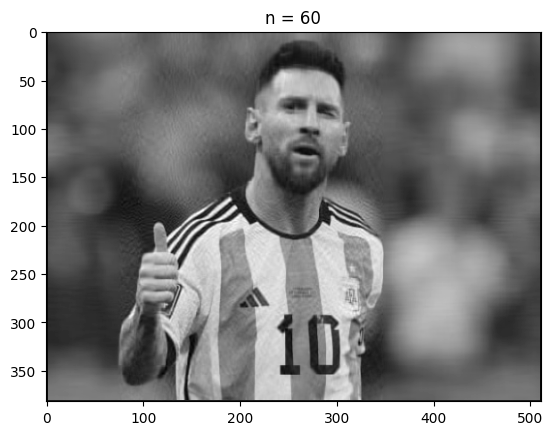

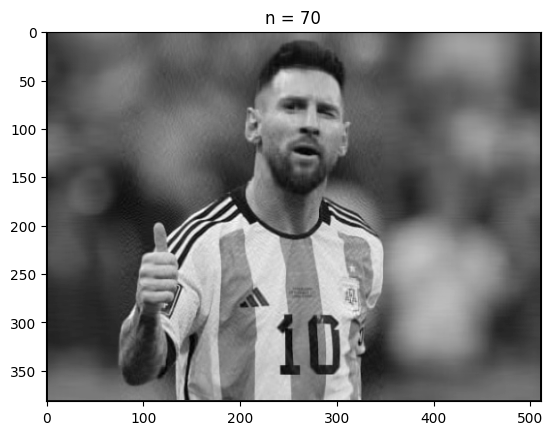

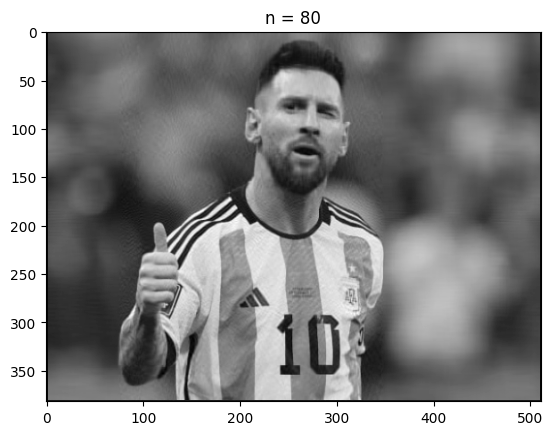

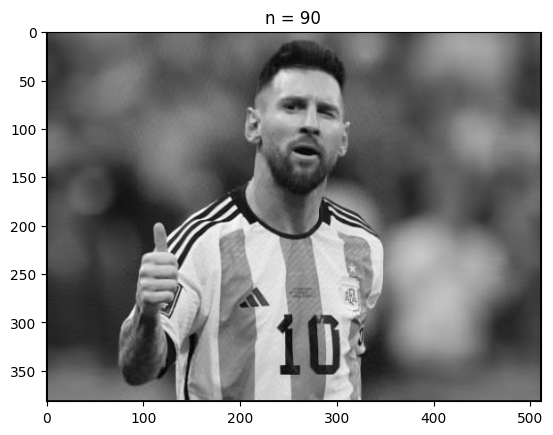

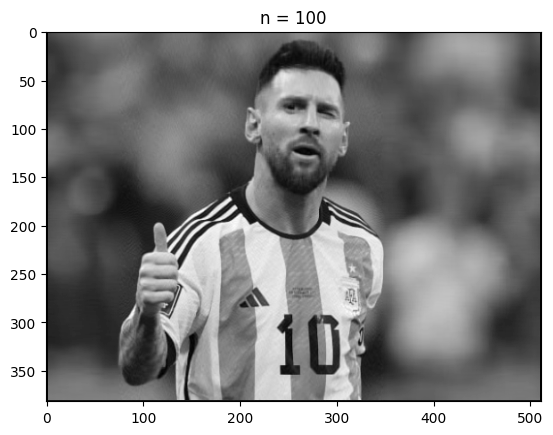

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from PIL import Image

#Script tomado de
#https://www.frankcleary.com/svdimage/

img = Image.open('/content/messi.PNG')
#abro imagen
imggray = img.convert('LA')
#la transformo en blanco y negro
imgmat = np.array(list(imggray.getdata(band=0)), float)
#convierte una lista con los datos de intensidad de pixeles
#luego transforma a un arreglo de np

imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
#plt.figure(figsize=(9,6))
#plt.imshow(imgmat, cmap='gray');


U, sigma, V = np.linalg.svd(imgmat)
#calcula svd

plt.plot(sigma[:100])
plt.title('Valores Singulares (Sigma)')
plt.xlabel('Índice')
plt.ylabel('Valor Singular')
plt.show()

for i in range(10, 110, 10):
    aprox = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    plt.imshow(aprox, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

